In [2]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Activation


In [3]:
# Cell 2: Load IMDB dataset
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path="ibdb.npz",
                                                       num_words=None,
                                                       skip_top=0,
                                                       maxlen=None,
                                                       seed=113,
                                                       start_char=1,
                                                       oov_char=2,
                                                       index_from=3)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [4]:
# Cell 3: Basic info about the dataset
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

print("X train shape: ", X_train.shape)
print("Y train shape: ", Y_train.shape)


Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
X train shape:  (25000,)
Y train shape:  (25000,)


In [5]:
# Cell 4:Check distribution of classes in training and test sets
print("Y train values: ", np.unique(Y_train))
print("Y test values: ", np.unique(Y_test))

unique, counts = np.unique(Y_train, return_counts=True)
print("Y train distribution: ", dict(zip(unique, counts)))

unique, counts = np.unique(Y_test, return_counts=True)
print("Y test distribution: ", dict(zip(unique, counts)))


Y train values:  [0 1]
Y test values:  [0 1]
Y train distribution:  {0: 12500, 1: 12500}
Y test distribution:  {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y test')

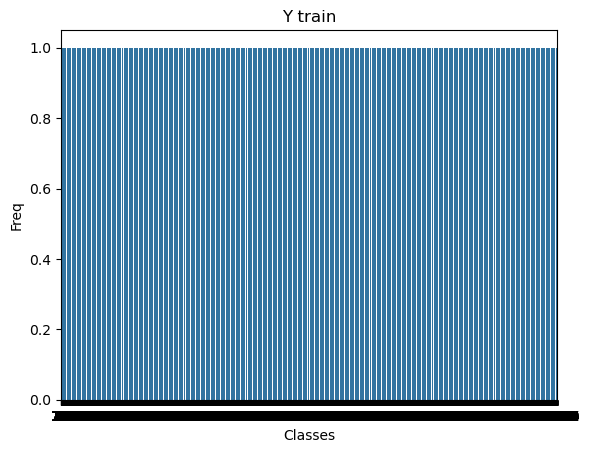

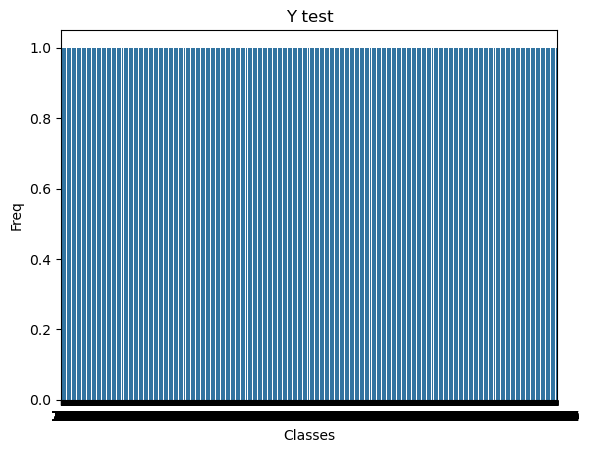

In [6]:
# Cell 5: Plotting class distributions
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")


In [7]:
# Cell 6: Inspect a sample review
sample_review = X_train[0]
print(sample_review)
print(len(sample_review))


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


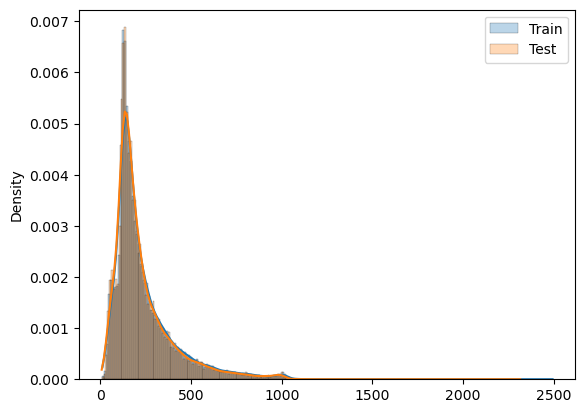

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=132, count=196)


In [8]:
# Cell 7: Analyze review lengths
review_len_train = [len(review) for review in X_train]
review_len_test = [len(review) for review in X_test]

# Plot review length distributions
sns.histplot(review_len_train, kde=True, stat="density", alpha=0.3, label='Train')
sns.histplot(review_len_test, kde=True, stat="density", alpha=0.3, label='Test')
plt.legend()
plt.show()

print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))


In [9]:
# Cell 8: Inspect the word index
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

for key, value in word_index.items():
    if value == 22:
        print(key)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
<class 'dict'>
88584
you


In [10]:
# Cell 9: Function to decode a review
def whatItSay(index=24):
    reverse_index = {value: key for (key, value) in word_index.items()}
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay(36)


! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


In [11]:
# Cell 10: Preprocess - Restrict vocabulary size and pad sequences
num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(X_train[5])

for review in X_train[0:10]:
    print(len(review))

decoded_review = whatItSay(5)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
130
130
130
130
130
130
130
130
130
130
! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all 

In [12]:
# Cell 11: RNN - Define and compile the RNN model
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length=len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape=(num_words, maxlen), return_sequences=False, activation="relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

c:\Users\Taner\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\Taner\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Cell 12: Train the model
history = rnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=128, verbose=1)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.6222 - loss: 0.6409 - val_accuracy: 0.8285 - val_loss: 0.4139
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8365 - loss: 0.3758 - val_accuracy: 0.7820 - val_loss: 0.5037
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8683 - loss: 0.3146 - val_accuracy: 0.8652 - val_loss: 0.3141
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8921 - loss: 0.2630 - val_accuracy: 0.7840 - val_loss: 0.5576
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9023 - loss: 0.2422 - val_accuracy: 0.8473 - val_loss: 0.3470


In [14]:
# Cell 13: Evaluate the model
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %", score[1] * 100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8459 - loss: 0.3525
Accuracy: % 84.72800254821777


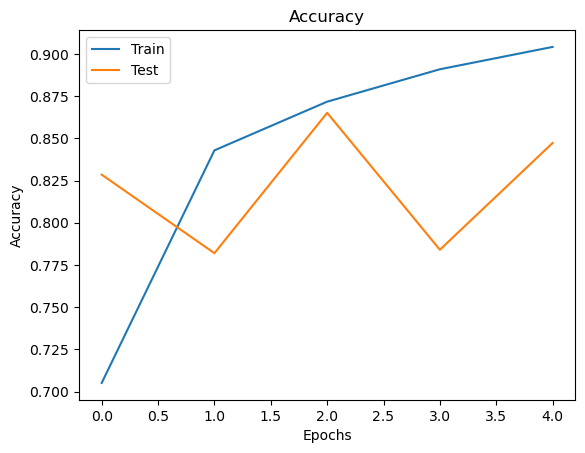

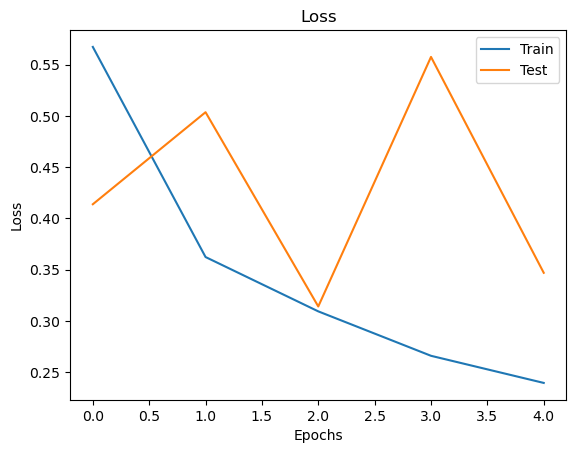

In [15]:
# Cell 14: Plot training history
plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()